## Project 1 Text Mining - Difference in Difference

##### Team: Elisa Scocco | Maria Simakova Mariukha | Victor Sobottka

## 3 - a)

In [1]:
import nltk 
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import PorsterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from datetime import datetime

In [3]:
data1=pd.read_csv('./dfhotelsbcnwithdescrmay.csv')
data2=pd.read_csv('./dfhotelsbcnwithdescrjune.csv')
data3=pd.read_csv('./dfhotelsvalwithdescrmay.csv')
data4=pd.read_csv('./dfhotelsvalwithdescrjune.csv')
combined_data = pd.concat([data1, data2, data3, data4], ignore_index=True)


In [7]:
combined_data


,City,Date Period,Hotel,Prices,Ratings,Description
0,Barcelona,2025-05-21 : 2025-05-25,Be Mate Paseo de Gracia,1443.0,8.9,"El Be Mate Paseo de Gracia, situado en Barcelo..."
1,Barcelona,2025-05-21 : 2025-05-25,Hotel La Pau 4 Sup,2568.0,9.6,El Hotel La Pau 4 Sup está situado en el centr...
2,Barcelona,2025-05-21 : 2025-05-25,Four Points by Sheraton Barcelona Airport,531.0,8.7,Four Points by Sheraton Barcelona Airport está...
3,Barcelona,2025-05-21 : 2025-05-25,Tembo Barcelona,1707.0,8.8,"Tembo Barcelona está en Barcelona, a 16 min a ..."
4,Barcelona,2025-05-21 : 2025-05-25,Axel TWO Barcelona 4 Sup - Adults Only,976.0,8.3,El TWO Hotel Barcelona by Axel está situado en...
...,...,...,...,...,...,...
3875,Valencia,2025-06-04 : 2025-06-08,NEW Beach Flats Valencia 3,895.0,10.0,NEW Beach Flats Valencia 3 se encuentra en Val...
3876,Valencia,2025-06-04 : 2025-06-08,L'Otelet By Sweet,390.0,7.7,"L'Otelet By Sweet está en Valencia, a 5,5 km d..."
3877,Valencia,2025-06-04 : 2025-06-08,Apartamento Cienciasmar,536.0,3.9,Apartamento Cienciasmar está en Valencia y ofr...
3878,Valencia,2025-06-04 : 2025-06-08,Pelayo with terrace Mid-term,1250.0,6.6,"Pelayo with terrace Mid-term está en Valencia,..."


In [14]:
#Creating the column treatment, 1 for treated group 0 for control group
combined_data['Treatment'] = (combined_data['City'] == "Barcelona").astype(int)
combined_data['Treatment']

0       1
1       1
2       1
3       1
4       1
       ..
3875    0
3876    0
3877    0
3878    0
3879    0
Name: Treatment, Length: 3880, dtype: int64

In [15]:
combined_data['Time_Period'] = combined_data['Date Period'].apply(
    lambda x: 1 if x in ['2025-06-04 : 2025-06-08'] else 0
)


In [ ]:
combined_data

In [16]:
combined_data.to_csv('combined_data.csv', index=False)  # index=False avoids writing row indices


## Difference-in-Differences (DiD) Model

The standard Difference-in-Differences (DiD) equation is:

$$
Y_{it} = \alpha + \beta \text{Post}_t + \gamma \text{Treatment}_i + \delta (\text{Post}_t \times \text{Treatment}_i) + X_{it} \theta + \epsilon_{it}
$$

where:

- \( Y_{it} \) is the outcome variable for unit \( i \) at time \( t \).
- \( \alpha \) is the intercept.
- \( \beta \) represents the effect of the post-treatment period.
- \( \gamma \) represents the effect of being in the treatment group.
- \( \delta \) is the **Difference-in-Differences estimator**, measuring the treatment effect.
- \( X_{it} \) is a vector of control variables with associated coefficients \( \theta \).
- \( \epsilon_{it} \) is the error term.

### Interpretation:
The coefficient \( \delta \) captures the **causal effect of the treatment**, comparing the difference in outcomes **before and after treatment** for the treated group relative to the control group.



For the analysis:
    
    Intercept (α): The average price in Valencia before the event.

    Treatment (γ): The baseline difference between Barcelona and Valencia before the event.

    Time_Period (β): The effect of the event on Valencia (control group).

    Interaction Term (δ): The Difference-in-Differences estimator, capturing the effect of the event on Barcelona relative to Valencia.

If δ is statistically significant, it suggests that the event had a causal effect on prices in Barcelona.

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the Difference-in-Differences model
model = smf.ols('Prices ~ Treatment + Time_Period + Treatment*Time_Period', data=combined_data).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     463.8
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          1.83e-257
Time:                        17:19:47   Log-Likelihood:                -32434.
No. Observations:                3880   AIC:                         6.488e+04
Df Residuals:                    3876   BIC:                         6.490e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               753.34

Coefficients and Interpretation:

    Intercept (753.35): This is the average price of houses for Valencia (the control group) in the pre-treatment period. In other words, this represents the baseline price when both the Treatment and Time_Period are 0 (Valencia before the treatment).

    Treatment (663.52): This coefficient tells you the price difference between Barcelona (treated group) and Valencia (control group) in the pre-treatment period.
        A coefficient of 663.52 means that, on average, house prices in Barcelona are 663.52 higher than in Valencia before the treatment. This gives us an initial difference in prices between the two cities before the treatment period.

    Time_Period (77.60): This coefficient measures the overall effect of time on house prices, regardless of whether the location is Barcelona or Valencia. It tells us how much the average house price increased in the post-treatment period for both cities, on average.
        Since the coefficient is 77.60 and it's not statistically significant (p-value = 0.100), we don't interpret this as a clear time-based effect. It suggests that the time period alone has a small and possibly insignificant impact on house prices.

    Treatment:Time_Period (797.71): This is the difference-in-differences coefficient. It captures the additional effect of being in Barcelona (treated group) during the post-treatment period. This is the key coefficient for estimating the causal effect of the treatment.
        A coefficient of 797.71 means that, in the post-treatment period, house prices in Barcelona increase by 797.71 more than house prices in Valencia, compared to the pre-treatment period.
        This is a statistically significant result (p-value = 0.000), suggesting that the treatment (which could be some intervention or change in policy in Barcelona) has a significant impact on house prices in Barcelona relative to Valencia.

Statistical Significance:

    p-values:
        The p-value for Treatment is 0.000, which is highly significant, meaning the difference in prices between Barcelona and Valencia before the treatment is significant.
        The p-value for Time_Period is 0.100, which is not significant at the usual 5% level, indicating that the time effect alone does not have a significant impact on prices.
        The p-value for Treatment:Time_Period is 0.000, which is very significant, meaning that the difference-in-differences effect (i.e., the impact of the treatment in Barcelona) is highly statistically significant.

Other Statistics:

    R-squared (0.264): This indicates that approximately 26.4% of the variation in house prices is explained by the model, which suggests a moderate fit. While this is not a very high value, it's reasonable for social science and economics data.
    F-statistic (463.8) and its p-value (1.83e-257) are very significant, indicating that the model overall explains the data well.
    Durbin-Watson statistic (1.106): This statistic is used to check for autocorrelation in the residuals. Values close to 2 suggest no autocorrelation, and this value (1.106) indicates some positive autocorrelation.

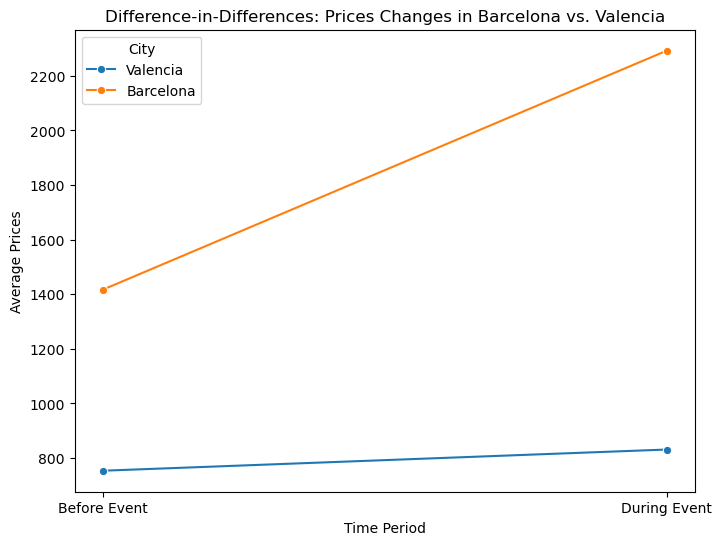

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean Prices for each group and time period
df_grouped = combined_data.groupby(['Treatment', 'Time_Period'])['Prices'].mean().reset_index()

# Replace numeric labels with text for readability
df_grouped['City'] = df_grouped['Treatment'].map({1: 'Barcelona', 0: 'Valencia'})
df_grouped['Period'] = df_grouped['Time_Period'].map({1: 'During Event', 0: 'Before Event'})

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(data=df_grouped, x='Period', y='Prices', hue='City', marker='o')
plt.title('Difference-in-Differences: Prices Changes in Barcelona vs. Valencia')
plt.ylabel('Average Prices')
plt.xlabel('Time Period')
plt.show()


Now let's add the feature "Ratings" to evaluate the changes in prices

The coefficient for Ratings will tell you how much the house prices change for each unit increase in Ratings, holding all other factors constant (including the treatment and time period).


In [25]:
model = smf.ols('Prices ~ Treatment + Time_Period + Treatment*Time_Period + Ratings', data=combined_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     350.9
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          6.19e-256
Time:                        18:00:41   Log-Likelihood:                -30290.
No. Observations:                3656   AIC:                         6.059e+04
Df Residuals:                    3651   BIC:                         6.062e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               509.77

Coefficient for Ratings: 29.42

    The Ratings variable has a coefficient of 29.42, which means that for each unit increase in the Ratings of a house, the house price is expected to increase by 29.42 units, holding all other factors constant (i.e., Treatment, Time_Period, and the interaction term).

Statistical Significance:

    The p-value for Ratings is 0.066, which is just above the typical significance level of 0.05. This means that Ratings is not statistically significant at the 5% level, but it is marginally significant at the 10% level. You might interpret this as suggesting that Ratings have some effect on house prices, but the evidence is weaker compared to other factors like the Treatment and Time_Period.

Confidence Interval:

    The 95% confidence interval for Ratings is [-1.92, 60.76]. This means we are 95% confident that the true effect of Ratings on house prices lies within this range.
        Since the confidence interval includes 0, it reinforces the idea that the effect of Ratings might not be significant because the effect could potentially be zero (i.e., no effect on prices).

Practical Interpretation:

    While the coefficient suggests that Ratings have a positive impact on house prices, the lack of strong statistical significance (p-value = 0.066) means that Ratings might not have a strong or reliable effect on house prices. It's still possible that other unaccounted factors are influencing prices more strongly.

Why do we need a control group:

    The role of a control group is assess the increments between the target city and control city, it works like a baseline to investigate the factors that might be affecting the increase of the prices in the target group.

## 3 - b) Using Text Features as Control

Why Text Features Help:

    Capture descriptive characteristics: The descriptions of the houses likely contain information that affects house prices but isn't captured by simple variables like Treatment, Time_Period, or Ratings. For example, the description could contain details about the size, condition, amenities, or unique features of the property, which may correlate with higher or lower prices.
    Improve model accuracy: By including text features as controls, you allow the model to adjust for these extra factors, which may improve its explanatory power and accuracy in estimating the effect of Treatment or Time_Period on prices.
    Identify trends and patterns: If certain terms in the descriptions (e.g., "luxury," "ocean view," "newly renovated") are strongly correlated with higher prices, incorporating those text features into the model helps identify and quantify these effects.

 Why Terms Like "Barcelona" May Not Help:

    Location already controlled: If you're comparing Barcelona (treated group) and Valencia (control group), the model already controls for the location through the Treatment variable. Including "Barcelona" in the text features would be redundant and could lead to multicollinearity because the location (Barcelona) is already represented by the Treatment variable (which distinguishes between treated and control groups).
    Lack of additional predictive power: "Barcelona" itself in the text might not provide new, useful information for predicting prices because the model already knows which observations are from Barcelona based on the Treatment variable. Including it as a text feature could just add noise rather than useful signal.

In [ ]:
text_features = pd.read_csv('')

In [ ]:
merged_data = 

In [ ]:
import statsmodels.formula.api as smf

# Assuming merged_data contains all necessary columns including Prices, Ratings, Treatment, and the TF-IDF features
model = smf.ols('Prices ~ Treatment + Time_Period + Treatment*Time_Period + Ratings + ' + ' + '.join(text_features.columns), data=merged_data).fit()
print(model.summary())

## 3 - c) Decompose the treatment effect

To decompose the treatment effect by hotel quality, one can use the text description features as a proxy for quality, and then study how the treatment effect varies depending on this quality. This approach allows one to analyze heterogeneous treatment effects, i.e., whether the treatment (Barcelona vs. Valencia) has different impacts on hotels with different levels of quality.

$$
\begin{split}
\text{Prices}_i &= \beta_0 + \beta_1 \text{Treatment}_i + \beta_2 \text{Time\_Period}_i + \beta_3 (\text{Treatment}_i \times \text{Time\_Period}_i) \\
&\quad + \beta_4 \text{Ratings}_i + \beta_5 \text{Quality}_i + \beta_6 (\text{Treatment}_i \times \text{Quality}_i) + \epsilon_i
\end{split}
$$

To **decompose the treatment effect by hotel quality**, you can use the text description features as a proxy for quality, and then study how the treatment effect varies depending on this quality. This approach allows you to analyze **heterogeneous treatment effects**, i.e., whether the treatment (Barcelona vs. Valencia) has different impacts on hotels with different levels of quality.

### Step 1: **Defining Hotel Quality Using Text Features**
Hotel quality can be represented in the text description through the **TF-IDF features**. Higher quality hotels might use certain words in their descriptions that correlate with better facilities, location, amenities, or condition. These words (e.g., "luxury," "modern," "renovated") could act as proxies for hotel quality.

To simplify, you could **aggregate** certain features from the text (e.g., by using the sum or average of TF-IDF values of specific words that indicate quality) to create a new variable representing **hotel quality**. For example, you might create a quality index using a weighted sum of the TF-IDF values of specific high-quality-related words (e.g., "luxury", "elegant", "premium").

Alternatively, you could use a **principal component analysis (PCA)** to reduce the dimensionality of the text features and extract a "quality" component that summarizes the textual features related to quality.

### Step 2: **Regression for Heterogeneous Treatment Effects**
To study heterogeneous treatment effects, you can interact the treatment variable (Barcelona vs. Valencia) with the **quality index** or the extracted quality component.

The **regression equation** to study heterogeneous treatment effects might look like this:

\[
\text{Prices}_i = \beta_0 + \beta_1 \text{Treatment}_i + \beta_2 \text{Time_Period}_i + \beta_3 (\text{Treatment}_i \times \text{Time_Period}_i) + \beta_4 \text{Ratings}_i + \beta_5 \text{Quality}_i + \beta_6 (\text{Treatment}_i \times \text{Quality}_i) + \epsilon_i
\]

Where:
- **Prices**: Dependent variable (house prices).
- **Treatment**: Binary variable indicating if the hotel is in Barcelona (treated group) or Valencia (control group).
- **Time_Period**: Indicator for the time period (before or after the treatment period).
- **Treatment \(\times\) Time_Period**: Interaction term representing the Difference-in-Differences (DiD) estimator.
- **Ratings**: Numeric feature for hotel ratings.
- **Quality**: A continuous variable representing the quality of the hotel, either based on an aggregated quality index or a dimension extracted from the text (e.g., PCA).
- **Treatment \(\times\) Quality**: Interaction term that captures **heterogeneous treatment effects** by hotel quality.
- \(\epsilon_i\): Error term.

### Step 3: **Interpretation**
1. **Main effects**:
   - \(\beta_1\) captures the overall treatment effect (Barcelona vs. Valencia) on house prices.
   - \(\beta_5\) measures the effect of hotel quality on prices, independent of treatment and time period.
   
2. **Interaction terms**:
   - \(\beta_6\) is the key coefficient. It captures how the treatment effect differs depending on hotel quality. 
     - If \(\beta_6\) is positive, it suggests that the treatment (being in Barcelona) has a **larger positive effect** on higher-quality hotels.
     - If \(\beta_6\) is negative, it implies that the treatment has a **smaller or even negative effect** on higher-quality hotels compared to lower-quality hotels.

### Step 4: **Steps to Implement**
1. **Create the Quality variable**:
   - If you're using an **aggregated text feature** (like a weighted sum of TF-IDF scores for quality-related words), create the quality variable in your dataset.
   - If using **PCA**, run PCA on the text features and extract the first principal component (or a set of components that explain most of the variance), which can be interpreted as the quality index.

2. **Run the regression** with the **interaction term** \(\text{Treatment} \times \text{Quality}\).

3. **Interpret the results**, particularly \(\beta_6\), to understand how the treatment effect differs by hotel quality.

### Example Use Case
- **High-quality hotels** (with more "luxury" and "premium" words in their descriptions) may see a larger **positive price increase** in Barcelona compared to **low-quality hotels**. This could reflect the fact that the treatment (being in Barcelona) increases demand more for higher-end hotels due to location desirability or other factors.
  
By including the interaction between **Treatment** and **Quality**, you're able to see how the effect of the treatment differs depending on the quality of the hotels, offering a more nuanced understanding of the treatment's impact.